## <center> A Sentiment Analysis model for products based on customers’ textual reviews,” using a Lexicon approach <center>

<center>
Team 6 

Theresa Bennett – 300909345 

Daniil Velykyi - ######### 

Shahzaib Mansoor - ######### 

Garnett Grant- 301188923 

Martel Baylis-Martin- ######### 
</center>
 

##### Prep 

In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [39]:
# Get the directory where the script is located
script_dir = os.path.dirname(os.path.abspath('__file__'))
file_path = os.path.join(script_dir, "Software_5.json")


In [40]:
# Read the JSON file line by line into a list
data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))


In [41]:
# Convert to DataFrame
df = pd.DataFrame(data)


In [42]:
# Display basic info
print(df.info())  
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         12805 non-null  float64
 1   verified        12805 non-null  bool   
 2   reviewTime      12805 non-null  object 
 3   reviewerID      12805 non-null  object 
 4   asin            12805 non-null  object 
 5   style           7161 non-null   object 
 6   reviewerName    12796 non-null  object 
 7   reviewText      12804 non-null  object 
 8   summary         12799 non-null  object 
 9   unixReviewTime  12805 non-null  int64  
 10  vote            3902 non-null   object 
 11  image           71 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None
   overall  verified   reviewTime      reviewerID        asin  \
0      4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816   
1      4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321

#### 1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
##### For example, look at:
(a) Counts, averages

(b) Distribution of the number of reviews across products

(c) Distribution of the number of reviews per product

(d) Distribution of reviews per user

(e) Review lengths and outliers

(f) Analyze lengths

(g) Check for duplicates

In [52]:
# (a) Counts, averages

# Count total number of reviews
total_reviews = len(df)

# Count unique products 
unique_products = df['asin'].nunique() if 'asin' in df.columns else None

# Count unique users 
unique_users = df['reviewerID'].nunique() if 'reviewerID' in df.columns else None

# Compute average reviews per user
avg_reviews_per_user = total_reviews / unique_users if unique_users else None

# Print results
print(f"Total Reviews: {total_reviews}")
print(f"Unique Products: {unique_products}")
print(f"Unique Users: {unique_users}")
print(f"Avg Reviews per User: {avg_reviews_per_user}")



Total Reviews: 12805
Unique Products: 802
Unique Users: 1826
Avg Reviews per User: 7.0125958378970425


Total Reviews: 12805
Unique Products: 802
Unique Users: 1826
Avg Reviews per User: 7.0125958378970425


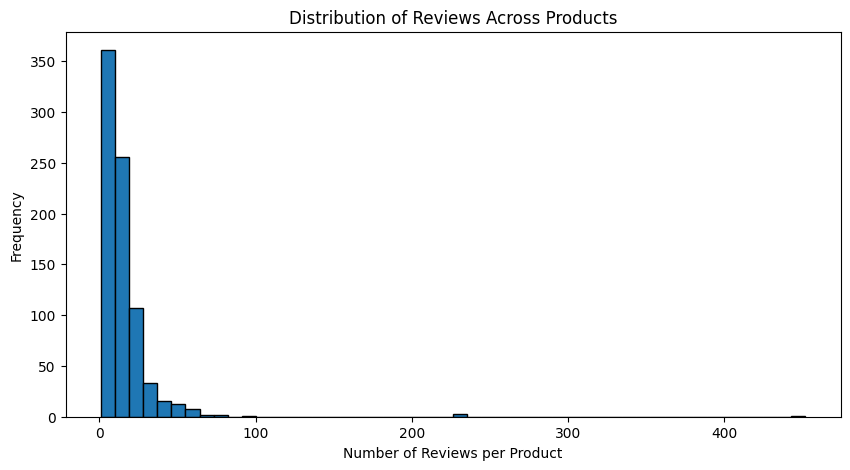

In [ ]:
# (b) Distribution of the number of reviews across products
if 'asin' in df.columns:
    review_count_per_product = df.groupby('asin')['reviewerID'].count()
    plt.figure(figsize=(10,5))
    plt.hist(review_count_per_product, bins=50, edgecolor='black')
    plt.xlabel('Number of Reviews per Product')
    plt.ylabel('Frequency')
    plt.title('Distribution of Reviews Across Products')
    plt.show()


In [28]:
# (c) Distribution of reviews per product
if 'asin' in df.columns:
    product_review_distribution = review_count_per_product.describe()
    print("Product Review Distribution Summary:")
    print(product_review_distribution)


Product Review Distribution Summary:
count    802.000000
mean      15.966334
std       23.508335
min        1.000000
25%        6.000000
50%       12.000000
75%       19.000000
max      452.000000
Name: reviewerID, dtype: float64


User Review Distribution Summary:
count    1826.000000
mean        7.012596
std         3.641218
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        55.000000
Name: asin, dtype: float64


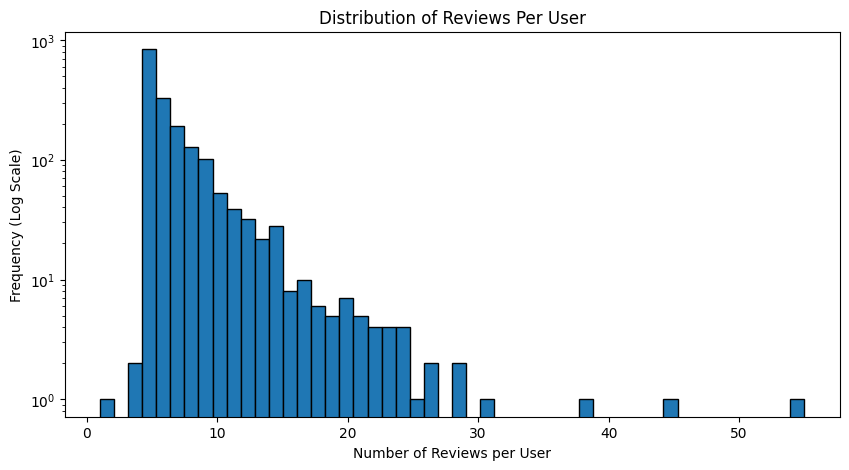

In [ ]:
# (d) Distribution of Reviews Per User
if 'reviewerID' in df.columns:
    review_count_per_user = df.groupby('reviewerID')['asin'].count()
    user_review_distribution = review_count_per_user.describe()
    print("User Review Distribution Summary:")
    print(user_review_distribution)

    # Visualize user review distribution
    plt.figure(figsize=(10,5))
    plt.hist(review_count_per_user, bins=50, edgecolor='black', log=True)
    plt.xlabel('Number of Reviews per User')
    plt.ylabel('Frequency (Log Scale)')
    plt.title('Distribution of Reviews Per User')
    plt.show()


Review Length Summary:
count    12805.000000
mean       175.384615
std        257.134085
min          0.000000
25%         33.000000
50%         98.000000
75%        221.000000
max       5118.000000
Name: review_length, dtype: float64


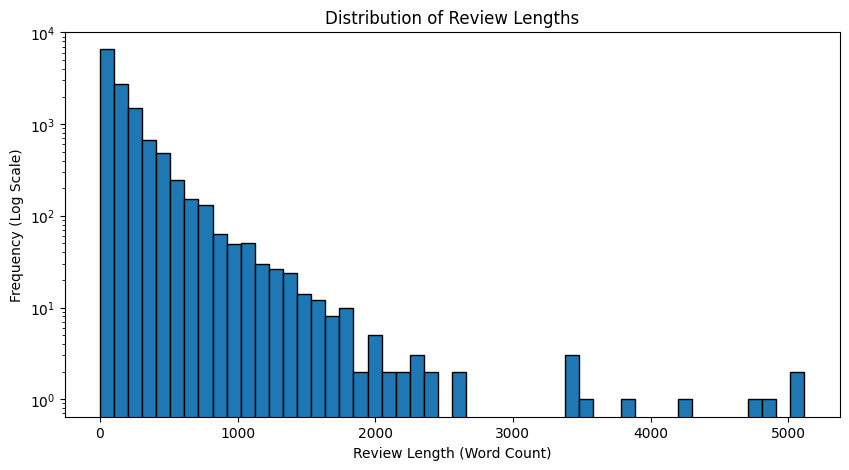

In [44]:
# (e) Review lengths and outliers
if 'reviewText' in df.columns:
    df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    print("Review Length Summary:")
    print(df['review_length'].describe())

    # Plot review length distribution
    plt.figure(figsize=(10,5))
    plt.hist(df['review_length'], bins=50, edgecolor='black', log=True)
    plt.xlabel('Review Length (Word Count)')
    plt.ylabel('Frequency (Log Scale)')
    plt.title('Distribution of Review Lengths')
    plt.show()


In [45]:
# (f) Identify outliers in review length
q1 = df['review_length'].quantile(0.25)
q3 = df['review_length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
print(f"Number of Review Length Outliers: {len(outliers)}")


Number of Review Length Outliers: 869


In [46]:
# (g) Check for duplicate reviews
if 'reviewText' in df.columns:
    duplicate_reviews = df.duplicated(subset=['reviewerID', 'asin', 'reviewText'], keep=False)
    num_duplicates = duplicate_reviews.sum()
    print(f"Number of Duplicate Reviews: {num_duplicates}")
    
    # Display some duplicate entries if they exist
    if num_duplicates > 0:
        print(df[duplicate_reviews].head(10))


Number of Duplicate Reviews: 1676
      overall  verified   reviewTime      reviewerID        asin style  \
409       5.0      True  04 11, 2006  A3ATKIU6MZZ4MU  B00005LBVS   NaN   
410       4.0      True  04 11, 2006  A3ATKIU6MZZ4MU  B00005LBVS   NaN   
411       4.0      True  04 11, 2006  A3ATKIU6MZZ4MU  B00005LBVS   NaN   
412       4.0      True  04 11, 2006  A3ATKIU6MZZ4MU  B00005LBVS   NaN   
850       5.0     False  11 29, 2013   A6XDZ1MJ0B1A2  B00022PTI4   NaN   
851       5.0     False  11 29, 2013   A6XDZ1MJ0B1A2  B00022PTI4   NaN   
946       5.0     False  06 16, 2005  A3UV7L5ND3EH8T  B00099YLPM   NaN   
947       5.0     False  06 16, 2005  A3UV7L5ND3EH8T  B00099YLPM   NaN   
948       5.0     False  06 16, 2005  A3UV7L5ND3EH8T  B00099YLPM   NaN   
1295      3.0     False   03 1, 2008  A1T1YSCDW0PD25  B000ES4PYU   NaN   

       reviewerName                                         reviewText  \
409          MElise  I was very happy with this game- it took the b...   
410

#### 2. Text Basic Pre-Processing


In [48]:
## (a) Label your data based on the value of “rating of the product” i.e. as follows:
## i. Ratings 4,5: Positive
## ii. Rating 3: Neutral
## iii. Ratings 1,2: Negative

df['label'] = df['overall'].apply(lambda x: 'Positive' if x in [4, 5] else 'Neutral' if x == 3 else 'Negative')
print(df['label'].value_counts())


label
Positive    8988
Negative    2219
Neutral     1598
Name: count, dtype: int64


In [ ]:
## (b) Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.
## I will choose the 'reviewText' column as the main feature for sentiment analysis, as it contains the actual text content of the reviews.
## The 'label' column will be used as the target variable for sentiment classification.


In [51]:
## (c) c. Check for outliers



#### 3. Study the below three Lexicons packages and choose two for model building justify why you chose them:

i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find
out more information here: https://github.com/cjhutto/vaderSentiment

ii. TextBlob you can find out more information here:
https://textblob.readthedocs.io/en/dev/quickstart.html

iii. SENTIWORDNET you can find more information here:
http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf

#### 4. Pre-process your text as needed, justify each pre-processing step for each model you chose. (Note: take into account the findings of step #3 above)

#### 5. Randomly select 1000 reviews from your dataset.



#### 6. Modeling (Sentiment Analysis) Lexicon approach:


In [ ]:

## a) Build two sentiment analysis models using the labeled pre-processed data for
## both the lexicons packages the team selected in step #3 above.



#### 7. Validate the results of both models and provide a comparision table.



#### 8. Presentation: Check project presentation requirements.



#### 9. Project report: Check project report requirements/ phase #1 (Make sure you refernce your work)



#### 10. Submit documented code.